# Ryota Nishida

## Research question/interests

How does an artist with multiple songs in the 90s hold up in 2022 in terms of the recognizability of their most recognized song based on the age of the listener when the song debuted?

Does the amount of songs an artist have reflect their songs' recognizability within millenials and gen-Zs?

How does recognizability of artists between the 2 generations compare to each other?

In [1]:
import pandas as pd

## Data Import

In [2]:
nineties = pd.read_csv("../data/raw/time_series_90s.csv")
gen = pd.read_csv("../data/raw/recognition_by_generation.csv")
df = nineties.merge(gen)
df

,artist,song,years_old_13,years_old_12,years_old_11,years_old_10,years_old_9,years_old_8,years_old_7,years_old_6,...,years_pre_birth_3,years_pre_birth_4,years_pre_birth_5,years_pre_birth_6,years_pre_birth_7,years_pre_birth_8,years_pre_birth_9,years_pre_birth_10,mean_millennial_recognition,mean_gen_z_recognition
0,2 Pac,California Love,0.647859,0.540000,0.711864,0.435484,0.644444,0.594203,0.600000,0.421053,...,0.151515,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.517602,0.268378
1,2Pac,How Do U Want It,0.265027,0.226415,0.382353,0.296296,0.229730,0.283582,0.138889,0.168831,...,0.166667,0.081081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209632,0.062439
2,702,Where My Girls At?,0.630772,0.614286,0.660377,0.415385,0.532258,0.375000,0.415094,0.275862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.553481,0.244176
3,Ace Of Base,All That She Wants,0.962963,0.940000,0.976190,0.877193,0.954545,0.953846,1.000000,0.852941,...,0.545455,0.523810,0.588235,0.485714,0.480000,0.000000,0.000000,0.000000,0.830967,0.540097
4,Ace Of Base,Don't Turn Around,0.899068,0.909091,0.826923,0.800000,0.756757,0.772727,0.666667,0.516129,...,0.363636,0.323529,0.414634,0.218750,0.000000,0.000000,0.000000,0.000000,0.623149,0.372787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Wilson Phillips,Release Me,0.695963,0.783784,0.694444,0.490566,0.518519,0.192308,0.254237,0.265625,...,0.045455,0.023810,0.019231,0.021739,0.000000,0.137931,0.066667,0.085714,0.127727,0.060286
340,Wilson Phillips,You're In Love,0.505111,0.500000,0.469388,0.351852,0.428571,0.283333,0.245283,0.238095,...,0.056604,0.038462,0.039216,0.068966,0.000000,0.062500,0.130435,0.000000,0.130290,0.060126
341,Wreckx-N-Effect,Rump Shaker,0.776325,0.745098,0.790323,0.634615,0.716981,0.564103,0.688525,0.471429,...,0.254902,0.218182,0.093750,0.076923,0.033333,0.227273,0.000000,0.000000,0.469101,0.148085
342,Xscape,Just Kickin' It,0.188492,0.161290,0.112903,0.184615,0.098361,0.065574,0.113208,0.073529,...,0.066667,0.027027,0.050000,0.081081,0.068966,0.000000,0.000000,0.000000,0.092154,0.052923


# Section 1: Data Set Exploration/Wrangling

In this section, the dataset will be further trimmed and manipulated to fit the research question, as well as making further analyses on unprocessed and processed datasets.

### 1.1. Preliminary Analyses and fixing names of artists to make them consistent across the dataset (ex. 2 Pac and 2Pac are the same artist).

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

df = df.replace('2 Pac','2Pac').replace('Backstreet Boys, The','Backstreet Boys').replace('C and C Music Factory','C+C Music Factory').replace('Janet','Janet Jackson').replace('Proclaimers, The','The Proclaimers')

print("Preliminary Analyses");print()
print("Shape of Dataset (no. of rows, no. of columns):",df.shape);print()
print("Columns of the Dataset:",df.columns);print()

Preliminary Analyses

Shape of Dataset (no. of rows, no. of columns): (344, 28)

Columns of the Dataset: Index(['artist', 'song', 'years_old_13', 'years_old_12', 'years_old_11',
       'years_old_10', 'years_old_9', 'years_old_8', 'years_old_7',
       'years_old_6', 'years_old_5', 'years_old_4', 'years_old_3',
       'years_old_2', 'years_old_1', 'years_old_0', 'years_pre_birth_1',
       'years_pre_birth_2', 'years_pre_birth_3', 'years_pre_birth_4',
       'years_pre_birth_5', 'years_pre_birth_6', 'years_pre_birth_7',
       'years_pre_birth_8', 'years_pre_birth_9', 'years_pre_birth_10',
       'mean_millennial_recognition', 'mean_gen_z_recognition'],
      dtype='object')



### 1.2. Unique values of artists and song titles and summary statistics

In [4]:

print("Unique name of artists and song titles");print()
uniq_artist = df['artist'].nunique()
uniq_song = df['song'].nunique()
print("Unique Artist Names:",uniq_artist)
print("Unique Song Names:",uniq_song)
print()


print("Summary Statistics");print()

df.describe()

Unique name of artists and song titles

Unique Artist Names: 205
Unique Song Names: 342

Summary Statistics



,years_old_13,years_old_12,years_old_11,years_old_10,years_old_9,years_old_8,years_old_7,years_old_6,years_old_5,years_old_4,...,years_pre_birth_3,years_pre_birth_4,years_pre_birth_5,years_pre_birth_6,years_pre_birth_7,years_pre_birth_8,years_pre_birth_9,years_pre_birth_10,mean_millennial_recognition,mean_gen_z_recognition
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.628447,0.598577,0.567753,0.524892,0.493182,0.457457,0.429371,0.401270,0.377275,0.342329,...,0.189620,0.159727,0.141217,0.116981,0.095605,0.078704,0.058703,0.027077,0.401364,0.235506
std,0.245944,0.251036,0.262154,0.266882,0.270655,0.274115,0.273253,0.269219,0.270310,0.264181,...,0.211834,0.199762,0.190924,0.173732,0.160761,0.146582,0.121197,0.083679,0.265956,0.210541
min,0.126577,0.046154,0.019231,0.015873,0.041667,0.000000,0.018519,0.015152,0.000000,0.021277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043351,0.019483
25%,0.437623,0.395196,0.349944,0.301415,0.264151,0.217803,0.193599,0.179889,0.150370,0.131915,...,0.036201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178364,0.095589
50%,0.641834,0.621417,0.556466,0.520691,0.477592,0.407207,0.372155,0.340024,0.299254,0.252660,...,0.125000,0.087977,0.073171,0.047065,0.000000,0.000000,0.000000,0.000000,0.344978,0.155398
75%,0.840540,0.786114,0.790659,0.751179,0.712225,0.673456,0.620892,0.559269,0.560939,0.506761,...,0.273173,0.227504,0.187907,0.157895,0.121212,0.120303,0.076923,0.000000,0.584260,0.303051
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.928571,0.900000,0.960000,0.933333,0.953488,0.830189,0.875000,0.851852,0.991851,0.963497


#### 1.3. Boxplots of Recognizability

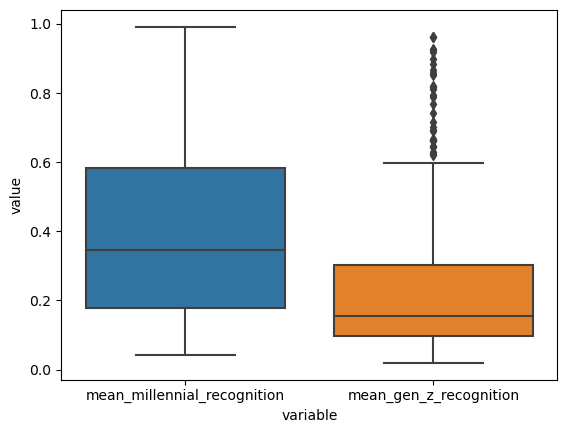

In [5]:
bdf = df[['mean_millennial_recognition','mean_gen_z_recognition']]
bdf = pd.melt(bdf)
sns.boxplot(x='variable',y='value',data=bdf)
plt.show()

From the 2 boxplots above, it can be seen that there is more recognition of 90s songs by millennials compared to recognition of 90s songs by gen Zs. Also, the boxplot of the Gen-Z recognizability shows a lot of high outliers.

#### 1.4. Bar Graph of Songs and Artists

In [6]:
song_count = df.groupby('artist')['song'].count()
song_count5 = song_count[song_count>=5]
sortsongcount5 = song_count5.sort_values(ascending=False)
sortsongcount5

artist
Mariah Carey       18
Janet Jackson      13
Whitney Houston     9
Boyz II Men         8
Madonna             8
Celine Dion         7
TLC                 6
R. Kelly            5
Name: song, dtype: int64

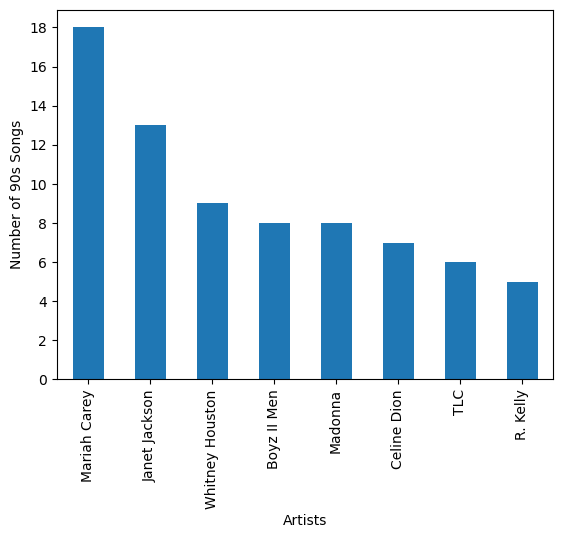

In [7]:
barplot = sortsongcount5.plot.bar()
plt.xlabel("Artists")
plt.ylabel("Number of 90s Songs")
plt.yticks(np.arange(0,20,2))
plt.show()

From the plot above, there are 8 artists that have more than 4 songs in this dataset, with Mariah Carey having 18 songs in the datasets, the most from all artists. Note that this visualization does not include collaborations (solo songs only).

#### 1.5. Bar Graph of Millennial Recognizability

In [8]:
recog_mil = df[['song','mean_millennial_recognition']]
recog_mil_top = recog_mil.loc[recog_mil['mean_millennial_recognition']>=0.95]
recog_mil_top = recog_mil_top.sort_values(by=['mean_millennial_recognition'],ascending=False)
print(recog_mil_top);print()

                     song  mean_millennial_recognition
47   ..Baby One More Time                     0.991851
66                Believe                     0.983381
290               Wannabe                     0.983007
156           Mambo No. 5                     0.982905
62    My Heart Will Go On                     0.974674
155              Macarena                     0.974079
21              Everybody                     0.966933
245   I Believe I Can Fly                     0.962350
285              All Star                     0.951832



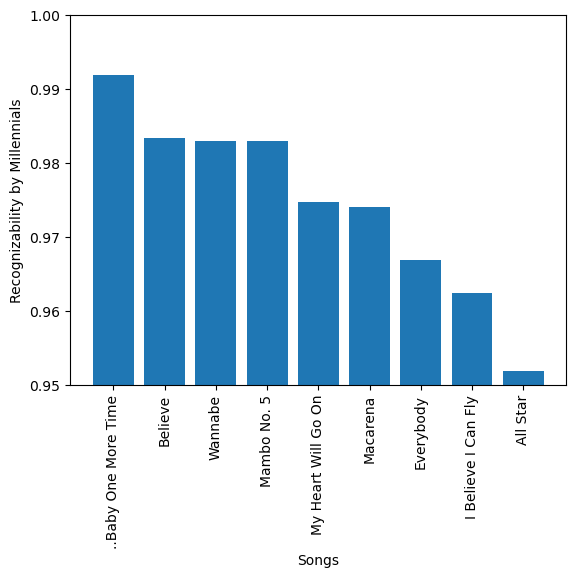

In [9]:
plt.bar(np.arange(len(recog_mil_top)),recog_mil_top['mean_millennial_recognition'])
plt.xticks(np.arange(len(recog_mil_top)),recog_mil_top['song'],rotation=90)
plt.ylim([0.95,1.00])
plt.xlabel("Songs")
plt.ylabel("Recognizability by Millennials")
plt.show()

From the bar graph above, there are 9 songs in the dataset that have more than 0.95 recognizability by millennials, indicating the 9 most popular 90s songs in this sample of the millennial population.

#### 1.6. Distribution Plots

##### Millennials

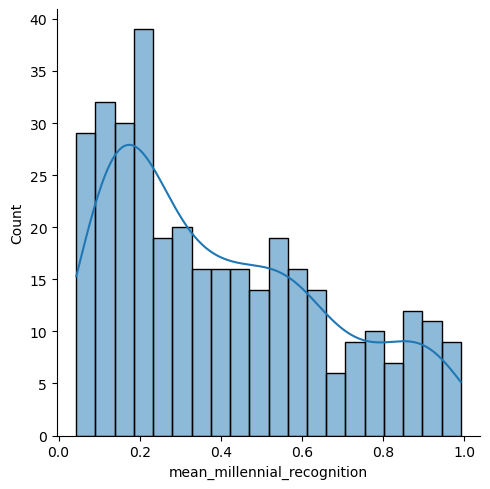

In [10]:
sns.displot(df['mean_millennial_recognition'],kde=True,bins=20)

##### Gen-Z

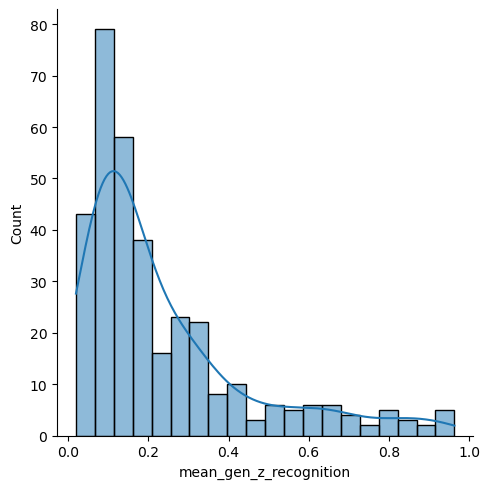

In [11]:
sns.displot(df['mean_gen_z_recognition'],kde=True,bins=20)

From the two distribution plots above, it can be seen that the distribution of recognizability by millennials are more evenly distributed throughout the range than recognizability by gen-Zs. Also, comparing the two plots, the mode of millennial recognizability is around 0.2, higher than the mode of gen-z recognizability (around 0.1).

#### 1.7. Joint Plot

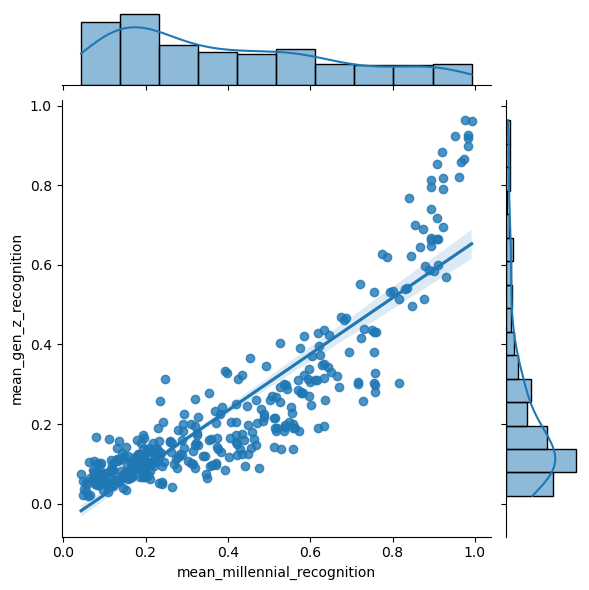

In [12]:
sns.jointplot(x='mean_millennial_recognition',y='mean_gen_z_recognition',data=df,kind='reg')

From the plot above, it can be seen that as as a song's recognizability by millennials increases, its recognizability by gen-Zs also increases. However, generally, the rate of increase of recognizability by millennials are higher than the rate of increase of recognizability by gen-Zs.

##### Note: All visualizations above are from unprocessed/uncleaned data

### Section 2: Loading and processing of raw data for analysis

#### 2.1. Unprocessed datasets

#### 2.1.1 Raw dataset containing recognizability of every year data

In [13]:
import project_functions1 as p1
data_1 = "../data/raw/time_series_90s.csv"
data_2 = "../data/raw/recognition_by_generation.csv"

p1.unprocessed(data_1)

,artist,song,years_old_13,years_old_12,years_old_11,years_old_10,years_old_9,years_old_8,years_old_7,years_old_6,...,years_pre_birth_1,years_pre_birth_2,years_pre_birth_3,years_pre_birth_4,years_pre_birth_5,years_pre_birth_6,years_pre_birth_7,years_pre_birth_8,years_pre_birth_9,years_pre_birth_10
0,2 Pac,California Love,0.647859,0.540000,0.711864,0.435484,0.644444,0.594203,0.600000,0.421053,...,0.371429,0.285714,0.151515,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2Pac,How Do U Want It,0.265027,0.226415,0.382353,0.296296,0.229730,0.283582,0.138889,0.168831,...,0.069767,0.027027,0.166667,0.081081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,702,Where My Girls At?,0.630772,0.614286,0.660377,0.415385,0.532258,0.375000,0.415094,0.275862,...,0.205882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ace Of Base,All That She Wants,0.962963,0.940000,0.976190,0.877193,0.954545,0.953846,1.000000,0.852941,...,0.702128,0.545455,0.545455,0.523810,0.588235,0.485714,0.480000,0.000000,0.000000,0.000000
4,Ace Of Base,Don't Turn Around,0.899068,0.909091,0.826923,0.800000,0.756757,0.772727,0.666667,0.516129,...,0.388889,0.418605,0.363636,0.323529,0.414634,0.218750,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Wilson Phillips,Release Me,0.695963,0.783784,0.694444,0.490566,0.518519,0.192308,0.254237,0.265625,...,0.070175,0.062500,0.045455,0.023810,0.019231,0.021739,0.000000,0.137931,0.066667,0.085714
340,Wilson Phillips,You're In Love,0.505111,0.500000,0.469388,0.351852,0.428571,0.283333,0.245283,0.238095,...,0.000000,0.067797,0.056604,0.038462,0.039216,0.068966,0.000000,0.062500,0.130435,0.000000
341,Wreckx-N-Effect,Rump Shaker,0.776325,0.745098,0.790323,0.634615,0.716981,0.564103,0.688525,0.471429,...,0.365385,0.285714,0.254902,0.218182,0.093750,0.076923,0.033333,0.227273,0.000000,0.000000
342,Xscape,Just Kickin' It,0.188492,0.161290,0.112903,0.184615,0.098361,0.065574,0.113208,0.073529,...,0.063830,0.019231,0.066667,0.027027,0.050000,0.081081,0.068966,0.000000,0.000000,0.000000


#### 2.1.2 Raw dataset containing recognizability by generation

In [14]:

p1.unprocessed(data_2)

,artist,song,mean_millennial_recognition,mean_gen_z_recognition
0,2 Pac,California Love,0.517602,0.268378
1,2Pac,How Do U Want It,0.209632,0.062439
2,702,Where My Girls At?,0.553481,0.244176
3,Ace Of Base,All That She Wants,0.830967,0.540097
4,Ace Of Base,Don't Turn Around,0.623149,0.372787
...,...,...,...,...
339,Wilson Phillips,Release Me,0.127727,0.060286
340,Wilson Phillips,You're In Love,0.130290,0.060126
341,Wreckx-N-Effect,Rump Shaker,0.469101,0.148085
342,Xscape,Just Kickin' It,0.092154,0.052923


#### 2.2 Processed dataset

#### Further information/details about data processing is in the project_functions1.py file

In [15]:
df_pro = p1.load_and_process(data_1,data_2)
df_pro

,artist,song,13 Years Old,12 Years Old,11 Years Old,10 Years Old,9 Years Old,8 Years Old,7 Years Old,6 Years Old,5 Years Old,4 Years Old,3 Years Old,2 Years Old,1 Years Old,Year Born,Recognition by Millennials,Recognition by Gen-Zs
0,2Pac,California Love,0.647859,0.540000,0.711864,0.435484,0.644444,0.594203,0.600000,0.421053,0.446429,0.391304,0.309091,0.372093,0.270833,0.340909,0.517602,0.268378
1,2Pac,How Do U Want It,0.265027,0.226415,0.382353,0.296296,0.229730,0.283582,0.138889,0.168831,0.215385,0.100000,0.108696,0.157895,0.068182,0.106383,0.209632,0.062439
2,702,Where My Girls At?,0.630772,0.614286,0.660377,0.415385,0.532258,0.375000,0.415094,0.275862,0.304348,0.408163,0.212766,0.272727,0.195122,0.225806,0.553481,0.244176
3,Ace Of Base,All That She Wants,0.962963,0.940000,0.976190,0.877193,0.954545,0.953846,1.000000,0.852941,0.900000,0.875000,0.779412,0.660377,0.770833,0.580000,0.830967,0.540097
4,Ace Of Base,Don't Turn Around,0.899068,0.909091,0.826923,0.800000,0.756757,0.772727,0.666667,0.516129,0.557377,0.629032,0.625000,0.403509,0.369231,0.442623,0.623149,0.372787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Wilson Phillips,Release Me,0.695963,0.783784,0.694444,0.490566,0.518519,0.192308,0.254237,0.265625,0.226415,0.120690,0.129870,0.202703,0.105263,0.049180,0.127727,0.060286
340,Wilson Phillips,You're In Love,0.505111,0.500000,0.469388,0.351852,0.428571,0.283333,0.245283,0.238095,0.152542,0.141026,0.067797,0.060606,0.090909,0.092308,0.130290,0.060126
341,Wreckx-N-Effect,Rump Shaker,0.776325,0.745098,0.790323,0.634615,0.716981,0.564103,0.688525,0.471429,0.470588,0.420290,0.389831,0.360656,0.468085,0.181818,0.469101,0.148085
342,Xscape,Just Kickin' It,0.188492,0.161290,0.112903,0.184615,0.098361,0.065574,0.113208,0.073529,0.081967,0.150685,0.092105,0.055556,0.089286,0.015625,0.092154,0.052923


Columns Deletion Note:
- Judging by a lot of 0s in the "pre-birth" columns, it can be assumed that the majority of the participants of the surveys were at least already born when the songs came out.
- This also implies that there are more people who were born in the 90s than the 00s taking the survey, implying that the data for millennial recognizability has a larger sample data than gen-Z recognizability data.

#### 2.3. Grouping the songs by Artists

In [16]:
df_pro['No. of Songs'] = df_pro['artist'].map(df_pro['artist'].value_counts())

In [17]:
art_df = p1.by_artist(df_pro)

#### 2.4. Sorted and final processed dataset

In [18]:
final_df = p1.sort_recog(art_df)
final_df

,artist,13 Years Old,12 Years Old,11 Years Old,10 Years Old,9 Years Old,8 Years Old,7 Years Old,6 Years Old,5 Years Old,4 Years Old,3 Years Old,2 Years Old,1 Years Old,Year Born,Recognition by Millennials,Recognition by Gen-Zs,No. of Songs
34,Celine Dion,1.000000,0.986667,1.000000,0.986486,0.987500,0.981481,0.948276,0.984127,0.956522,0.911111,0.975000,0.980392,0.950000,0.942857,0.974674,0.963497,7
136,R. Kelly,0.978495,0.983333,0.985507,0.962264,0.985294,0.921569,0.970588,0.939394,0.981132,0.958333,0.938776,0.891304,0.966667,0.830189,0.962350,0.819579,5
194,Whitney Houston,0.974150,0.973333,0.963636,0.980000,0.953271,0.913386,0.914530,0.904348,0.925234,0.900000,0.928000,0.869231,0.859813,0.864078,0.906714,0.852951,9
115,Michael Jackson,0.992248,0.965517,0.956522,0.981132,0.968750,0.982143,1.000000,0.980000,0.928571,0.933333,0.830189,0.850000,0.797101,0.811321,0.893536,0.812753,3
31,C+C Music Factory,0.936165,0.950000,0.976744,0.964286,0.851852,0.844444,0.877551,0.876923,0.956522,0.876923,0.835821,0.816327,0.950820,0.830986,0.873686,0.689388,3
172,TLC,0.963088,0.959184,0.876923,0.872340,0.888889,0.849315,0.900000,0.816327,0.811111,0.750000,0.766667,0.636364,0.829268,0.613636,0.893036,0.667104,6
185,Toni Braxton,0.974389,0.924528,0.955224,0.932203,0.950820,0.907895,0.936508,0.842105,0.862069,0.880000,0.777778,0.818182,0.642857,0.666667,0.901616,0.584687,3
2,Ace Of Base,0.978571,0.954545,0.983607,0.933333,0.954545,0.953846,1.000000,0.893333,0.904762,0.875000,0.805970,0.725490,0.770833,0.765957,0.879769,0.597304,3
102,Madonna,0.976587,0.914286,0.941176,0.975610,0.940000,0.912281,0.792453,0.851852,0.796875,0.842105,0.637931,0.673077,0.696429,0.647059,0.686213,0.466935,8
29,Bryan Adams,0.952210,0.939394,0.958333,0.962963,0.900000,0.925926,0.892308,0.884058,0.833333,0.780488,0.776119,0.750000,0.734375,0.647887,0.723258,0.415712,4


### Section 3: Data Analysis

In [19]:
print("Shape of Dataset (no. of rows, no. of columns):",final_df.shape);print()
print("Columns of the Dataset:",final_df.columns);print()

Shape of Dataset (no. of rows, no. of columns): (26, 18)

Columns of the Dataset: Index(['artist', '13 Years Old', '12 Years Old', '11 Years Old',
       '10 Years Old', '9 Years Old', '8 Years Old', '7 Years Old',
       '6 Years Old', '5 Years Old', '4 Years Old', '3 Years Old',
       '2 Years Old', '1 Years Old', 'Year Born', 'Recognition by Millennials',
       'Recognition by Gen-Zs', 'No. of Songs'],
      dtype='object')



#### 3.1. Data frame statistics description

In [20]:
df_pro.describe(include='object')

,artist,song
count,339,339
unique,200,337
top,Mariah Carey,Hold On
freq,18,2


#### 3.2. Final data frame description

In [21]:
final_df.describe()

,13 Years Old,12 Years Old,11 Years Old,10 Years Old,9 Years Old,8 Years Old,7 Years Old,6 Years Old,5 Years Old,4 Years Old,3 Years Old,2 Years Old,1 Years Old,Year Born,Recognition by Millennials,Recognition by Gen-Zs,No. of Songs
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.832200,0.822694,0.803320,0.764427,0.755109,0.711628,0.694878,0.656111,0.647592,0.614332,0.546678,0.536662,0.520960,0.505529,0.638108,0.420541,5.153846
std,0.162583,0.150387,0.197639,0.192888,0.197966,0.208620,0.233189,0.233931,0.230786,0.245296,0.262231,0.246216,0.272950,0.252043,0.213906,0.251400,3.607684
min,0.483771,0.500000,0.403509,0.375000,0.305085,0.245614,0.181818,0.196429,0.190476,0.101695,0.166667,0.177419,0.136364,0.105263,0.322589,0.134707,3.000000
25%,0.775656,0.774633,0.687312,0.660385,0.660985,0.554930,0.581532,0.461071,0.459524,0.448413,0.294947,0.341532,0.303886,0.291209,0.442862,0.213749,3.000000
50%,0.863161,0.856410,0.882906,0.743929,0.777778,0.707390,0.696774,0.655434,0.620144,0.607273,0.520215,0.491723,0.512714,0.496970,0.626352,0.343814,4.000000
75%,0.971384,0.953409,0.957880,0.955031,0.930000,0.911184,0.898077,0.870655,0.854885,0.866776,0.777363,0.743873,0.761719,0.687853,0.878248,0.594150,5.750000
max,1.000000,0.986667,1.000000,0.986486,0.987500,0.982143,1.000000,0.984127,0.981132,0.958333,0.975000,0.980392,0.966667,0.942857,0.974674,0.963497,18.000000


#### 3.3. Final Data frame sorted by 'Recognition by Millennials'

In [22]:
final_df.sort_values(by=['Recognition by Millennials'], ascending=False).head(10)

,artist,13 Years Old,12 Years Old,11 Years Old,10 Years Old,9 Years Old,8 Years Old,7 Years Old,6 Years Old,5 Years Old,4 Years Old,3 Years Old,2 Years Old,1 Years Old,Year Born,Recognition by Millennials,Recognition by Gen-Zs,No. of Songs
34,Celine Dion,1.000000,0.986667,1.000000,0.986486,0.987500,0.981481,0.948276,0.984127,0.956522,0.911111,0.975000,0.980392,0.950000,0.942857,0.974674,0.963497,7
136,R. Kelly,0.978495,0.983333,0.985507,0.962264,0.985294,0.921569,0.970588,0.939394,0.981132,0.958333,0.938776,0.891304,0.966667,0.830189,0.962350,0.819579,5
194,Whitney Houston,0.974150,0.973333,0.963636,0.980000,0.953271,0.913386,0.914530,0.904348,0.925234,0.900000,0.928000,0.869231,0.859813,0.864078,0.906714,0.852951,9
185,Toni Braxton,0.974389,0.924528,0.955224,0.932203,0.950820,0.907895,0.936508,0.842105,0.862069,0.880000,0.777778,0.818182,0.642857,0.666667,0.901616,0.584687,3
115,Michael Jackson,0.992248,0.965517,0.956522,0.981132,0.968750,0.982143,1.000000,0.980000,0.928571,0.933333,0.830189,0.850000,0.797101,0.811321,0.893536,0.812753,3
172,TLC,0.963088,0.959184,0.876923,0.872340,0.888889,0.849315,0.900000,0.816327,0.811111,0.750000,0.766667,0.636364,0.829268,0.613636,0.893036,0.667104,6
2,Ace Of Base,0.978571,0.954545,0.983607,0.933333,0.954545,0.953846,1.000000,0.893333,0.904762,0.875000,0.805970,0.725490,0.770833,0.765957,0.879769,0.597304,3
31,C+C Music Factory,0.936165,0.950000,0.976744,0.964286,0.851852,0.844444,0.877551,0.876923,0.956522,0.876923,0.835821,0.816327,0.950820,0.830986,0.873686,0.689388,3
29,Bryan Adams,0.952210,0.939394,0.958333,0.962963,0.900000,0.925926,0.892308,0.884058,0.833333,0.780488,0.776119,0.750000,0.734375,0.647887,0.723258,0.415712,4
149,Savage Garden,0.824753,0.777778,0.768116,0.685714,0.711538,0.629630,0.626374,0.535714,0.535714,0.460317,0.255319,0.350000,0.212121,0.285714,0.715086,0.301116,3


#### 3.4. Final Data frame sorted by 'Recognition by Gen-Zs'

In [23]:
final_df.sort_values(by=['Recognition by Gen-Zs'], ascending=False).head(10)

,artist,13 Years Old,12 Years Old,11 Years Old,10 Years Old,9 Years Old,8 Years Old,7 Years Old,6 Years Old,5 Years Old,4 Years Old,3 Years Old,2 Years Old,1 Years Old,Year Born,Recognition by Millennials,Recognition by Gen-Zs,No. of Songs
34,Celine Dion,1.000000,0.986667,1.000000,0.986486,0.987500,0.981481,0.948276,0.984127,0.956522,0.911111,0.975000,0.980392,0.950000,0.942857,0.974674,0.963497,7
194,Whitney Houston,0.974150,0.973333,0.963636,0.980000,0.953271,0.913386,0.914530,0.904348,0.925234,0.900000,0.928000,0.869231,0.859813,0.864078,0.906714,0.852951,9
136,R. Kelly,0.978495,0.983333,0.985507,0.962264,0.985294,0.921569,0.970588,0.939394,0.981132,0.958333,0.938776,0.891304,0.966667,0.830189,0.962350,0.819579,5
115,Michael Jackson,0.992248,0.965517,0.956522,0.981132,0.968750,0.982143,1.000000,0.980000,0.928571,0.933333,0.830189,0.850000,0.797101,0.811321,0.893536,0.812753,3
31,C+C Music Factory,0.936165,0.950000,0.976744,0.964286,0.851852,0.844444,0.877551,0.876923,0.956522,0.876923,0.835821,0.816327,0.950820,0.830986,0.873686,0.689388,3
172,TLC,0.963088,0.959184,0.876923,0.872340,0.888889,0.849315,0.900000,0.816327,0.811111,0.750000,0.766667,0.636364,0.829268,0.613636,0.893036,0.667104,6
2,Ace Of Base,0.978571,0.954545,0.983607,0.933333,0.954545,0.953846,1.000000,0.893333,0.904762,0.875000,0.805970,0.725490,0.770833,0.765957,0.879769,0.597304,3
185,Toni Braxton,0.974389,0.924528,0.955224,0.932203,0.950820,0.907895,0.936508,0.842105,0.862069,0.880000,0.777778,0.818182,0.642857,0.666667,0.901616,0.584687,3
102,Madonna,0.976587,0.914286,0.941176,0.975610,0.940000,0.912281,0.792453,0.851852,0.796875,0.842105,0.637931,0.673077,0.696429,0.647059,0.686213,0.466935,8
179,The Notorious B.I.G,0.711201,0.803922,0.660377,0.661538,0.626866,0.543478,0.661972,0.596154,0.627451,0.534483,0.552632,0.395833,0.528302,0.466667,0.633514,0.436283,4


#### 3.4. Final Data frame differences value count between 'Recognition by Millennials' and 'Recognition by Gen-Zs' 

In [24]:
final_df['diff'] = final_df['Recognition by Millennials']-final_df['Recognition by Gen-Zs']
print((final_df['diff']>0).value_counts())
final_df = final_df.drop(columns=['diff'])

True    26
Name: diff, dtype: int64


#### 3.5. Music data frame analysis

- Mariah Carey has the most solo songs released in the 1990s (in this dataset) with 18 songs.
- From all artists with at least 3 songs in the dataset, Celine Dion has the most recognizability based on their most recognizable song within both millenials and gen-Zs.
- All 90s artists with more than 3 solo songs are more recognized in 2022 by millennials than gen-Zs.

#### 3.5.1. Pandas Profiling Analysis

- Artists with less than 3 songs in the dataset are removed, to focus the dataset and analysis, and also removing potential "one-hit wonders", since these kinds of songs reflect more on the recognizability of the actual song rather than the popularity of the artist themselves.
- Artists like Mariah Carey and Janet Jackson are very popular in pop culture,and are also the top 2 artists with the most famous 90s songs in the dataset, but does not necessarily have high recognizability of her songs.
- Note that recognizability values of an artist analyzed are based on their most recognized song (if the artist released multiple songs). Although it is not a perfect reflection of how recognized the artists are, it is a decent reflection of the artists' abilities to create a recognized song, in turn making listeners also recognize the artists themselves.

#### 3.6. Lm Plot

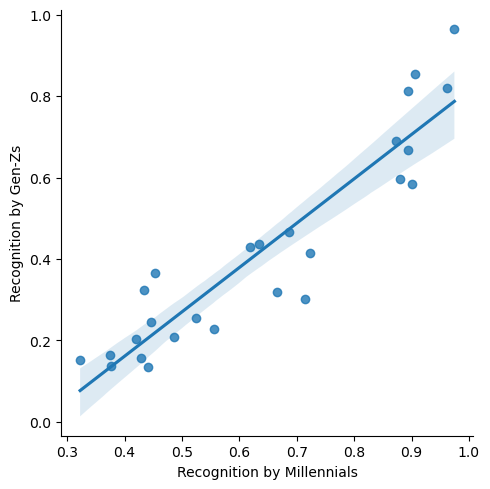

In [25]:
sns.lmplot(x='Recognition by Millennials',y='Recognition by Gen-Zs',data=final_df)
plt.show()

From the plot above, it can be seen that recognition by millennials and recognition by gen-Zs are directly proportional, meaning that as recognition by millennials increases, recognition by gen-Zs also increases. This means that an artist that is very recognized by millennials is also likely to be very recognized by gen-Zs. This also means that an artist that has never been heard by millennials is also likely to be unknown by gen-Zs.

The regression line, however, indicates that the rate of increase of recognizability by millennials is larger than the rate of increase of recognizability by gen-Zs, meaning that millennials are likely to recognize 90s artists than gen-Zs as recognizability of an artist by millennials increases.

#### 3.7. Line Plot

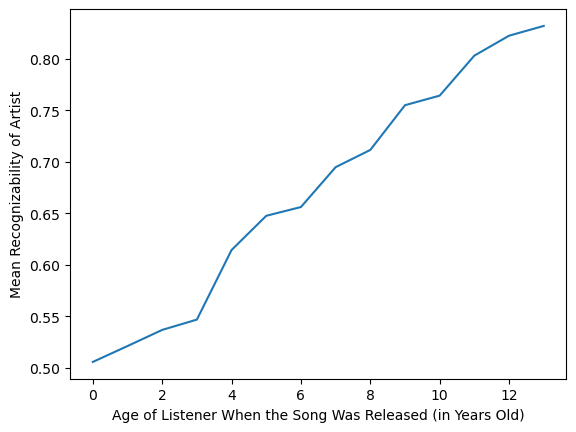

In [26]:
xmean = list(range(0,14))
m_0 = final_df['Year Born'].mean()
ymean = [m_0]
for i in range(1,14):
    m = final_df[f'{i} Years Old'].mean()
    ymean.append(m)

ax = sns.lineplot(x=xmean,y=ymean)
ax.set(xlabel="Age of Listener When the Song Was Released (in Years Old)",
      ylabel="Mean Recognizability of Artist")
plt.show()

From the plot above, it can be seen that as the age of the survey taker/listener gets older when the song in question was released, the recognizability of the artist of the song in 2022 also increases. This means that the older someone is when an artist released a song, the more likely that someone recognize the artist in question in 2022.

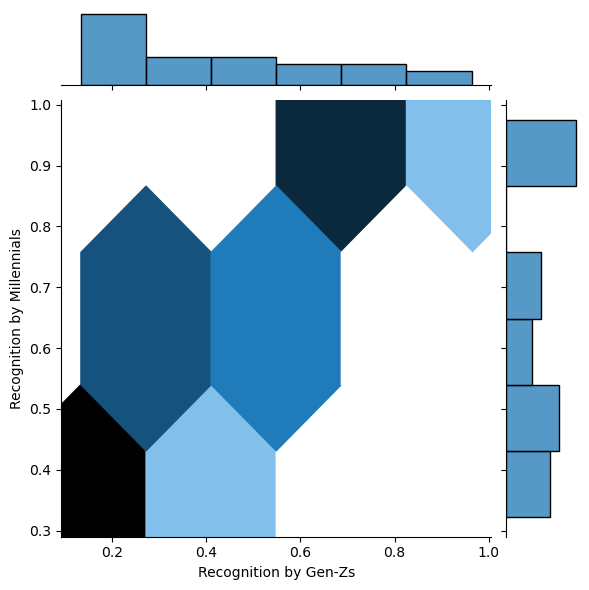

In [27]:
sns.jointplot(data=final_df, y='Recognition by Millennials', x='Recognition by Gen-Zs', kind='hex')

From the plot above, it can be seen that the hexagons with the darkest colors are located near the 0-0.2 values of both axes. This means that a quite large portion of correspondents from both generations (millennials and gen-Zs) do not really recognize most of the artists from the 90s. This implies that a lot of 90s artists do not really hold up well in terms of recognizability of their most recognized songs, around 20 years after they released their songs.

#### 3.8. Box Plot

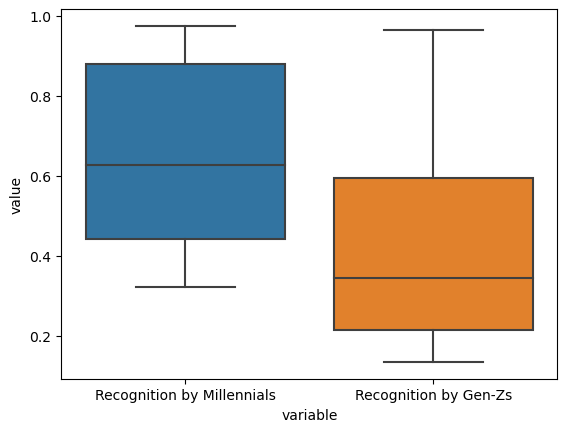

In [28]:
boxdf = final_df[['Recognition by Millennials','Recognition by Gen-Zs']]
boxdf = pd.melt(boxdf)
sns.boxplot(x='variable',y='value',data=boxdf)
plt.show()

From the boxplots above, it supports the idea that recognition of 90s artists by millennials is generally larger than recognition of 90s artists by gen-Zs. This means that a millennial is more likely to recognize a 90s artist by their most recognized song than a gen-Z.

## 3.7. Conclusions

Generally, the older a person gets when a 90's song debuted, the more chance that the person recognizes the song in question.

The number of songs an artist has in the 90's does not necessarily affect the recognizability of their most recognized songs. In addition, the popularity of an artist in pop culture also does not mean that their songs are highly recognizable.

Comparing the 2 generations, all 90's songs by artists with at least 3 90's songs in the dataset have more recognizability within millenials than gen-Zs.

## Export Final Dataset to CSV

In [29]:
final_df.to_csv("../data/processed/final_df.csv",index=False)